In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
pd.set_option('display.max_columns', None)

In [132]:
df = pd.read_csv('./gurgaon_properties_outlier_treated.csv')

In [133]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,2,97,392.333333
1,1,flat,raheja vedaanta,sector 108,0.85,4637.0,1833.0,Super Built up area 1833(170.29 sq.m.)Built Up...,3,3,2,2.0,North-East,Relatively New,1833.0,1500.0,1350.00,0,1,0,0,0,0,65,611.000000
2,2,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.00,0,0,0,1,0,1,0,360.000000
3,3,flat,laxmi pareena,sector 99a,0.30,6667.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,12.0,North,Undefined,NaN,NaN,450.00,0,0,0,0,0,0,0,225.000000
4,4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,2,152,550.000000


In [134]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1671
built_up_area          1960
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

Goal:  built_up_area (1960), floorNum (2.0), facing (nan), agePossession (nan) , super_built_up_area (nan), carpet_area (nan)

---

## Built up area

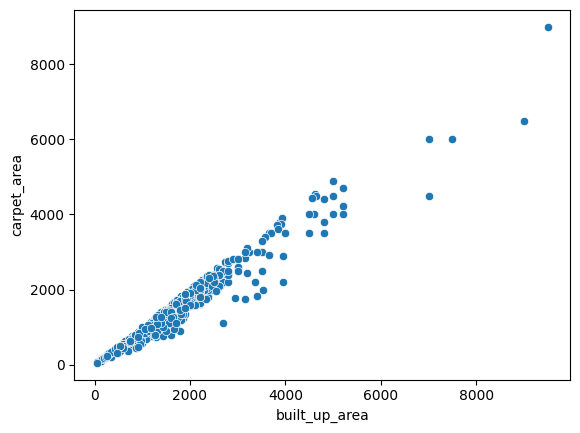

In [135]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])
plt.show()

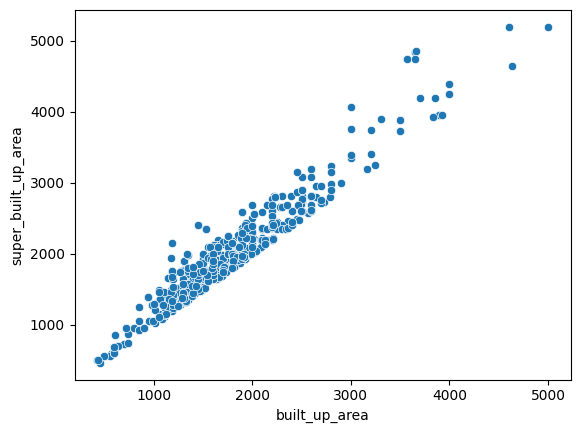

In [136]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])
plt.show()

In [137]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3540    False
3541    False
3542    False
3543    False
3544    False
Length: 3545, dtype: bool

In [138]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [139]:
all_present_df.shape

(531, 25)

In [140]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [141]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [142]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [143]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [144]:
sbc_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3,3,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,2,97,392.333333
4,4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,2,152,550.000000
7,7,flat,emaar mgf palm hills,sector 77,1.90,9500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3,4,3+,6.0,South-West,New Property,2000.0,NaN,1218.03,0,1,0,0,0,2,42,666.666667
8,8,flat,signature global the millennia,sector 37d,0.65,10906.0,596.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,0.0,NaN,New Property,650.0,NaN,596.00,0,0,0,0,0,0,40,298.000000
9,9,flat,tarc maceo,sector 91,1.75,11118.0,1574.0,Super Built up area 2724(253.07 sq.m.)Carpet a...,4,3,3+,8.0,South,Relatively New,2724.0,NaN,1573.59,1,1,1,1,0,0,128,393.500000


In [145]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/tmp/ipykernel_2753/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/tmp/ipykernel_2753/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_bu

In [146]:
df.update(sbc_df)

In [147]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1671
built_up_area          1539
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [148]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [149]:
sb_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,5,flat,mapsko royale ville,sector 82,0.97,5419.0,1790.0,Super Built up area 1790(166.3 sq.m.),3,4,2,16.0,North-West,Relatively New,1790.0,NaN,NaN,0,1,0,0,0,0,95,596.666667
6,6,flat,aipl the peaceful homes,sector 70a,2.40,11163.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3,11.0,South-West,Relatively New,2150.0,NaN,NaN,0,1,0,0,0,0,108,716.666667
12,12,flat,ireo victory valley,sector 67,4.55,14537.0,3130.0,Super Built up area 3130(290.79 sq.m.),4,4,3+,19.0,South,Relatively New,3130.0,NaN,NaN,0,1,0,0,0,2,156,782.500000
15,15,flat,godrej aria,sector 79,1.10,11482.0,958.0,Super Built up area 89,2,2,3,9.0,NaN,New Property,89.0,NaN,NaN,0,0,0,0,0,0,62,479.000000
27,27,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,19.0,East,New Property,5350.0,NaN,NaN,1,1,1,1,0,2,160,1337.500000


In [150]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/tmp/ipykernel_2753/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/tmp/ipykernel_2753/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [151]:
df.update(sb_df)

In [152]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1671
built_up_area           665
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [153]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [154]:
c_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,2,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.0,0,0,0,1,0,1,0,360.00
3,3,flat,laxmi pareena,sector 99a,0.30,6667.0,450.0,Carpet area: 450 (41.81 sq.m.),2,1,0,12.0,North,Undefined,NaN,NaN,450.0,0,0,0,0,0,0,0,225.00
16,16,flat,paras dews,sector 106,1.35,8940.0,1510.0,Carpet area: 1510 (140.28 sq.m.),4,3,3,19.0,NaN,Old Property,NaN,NaN,1510.0,0,1,0,0,0,0,112,377.50
18,18,flat,tulip monsella,sector 53,7.40,33199.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,21.0,NaN,Under Construction,NaN,NaN,2229.0,0,0,0,0,0,0,35,557.25
21,21,flat,signature the roselia,sector 95,0.45,7909.0,569.0,Carpet area: 569 (52.86 sq.m.),2,2,2,2.0,East,New Property,NaN,NaN,569.0,0,0,0,0,0,2,31,284.50


In [155]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/tmp/ipykernel_2753/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/tmp/ipykernel_2753/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [156]:
df.update(c_df)

In [157]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1671
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

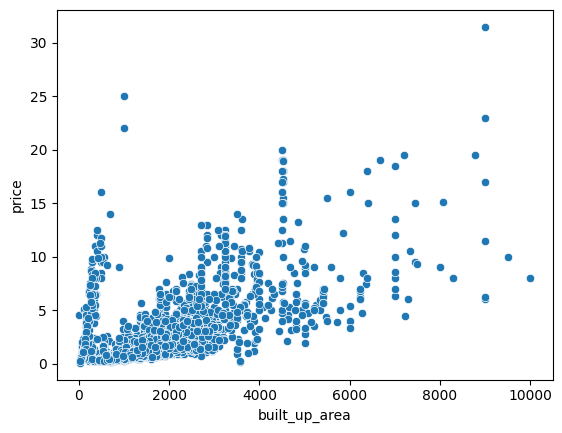

In [158]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])
plt.show()


In [159]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [160]:
anamoly_df.sample(5)

,price,area,built_up_area
1383,4.50,1350.0,1350.0
751,7.00,2160.0,240.0
1268,11.75,5056.0,502.0
541,10.00,4950.0,550.0
1982,6.50,1800.0,1800.0


In [161]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [162]:
df.update(anamoly_df)

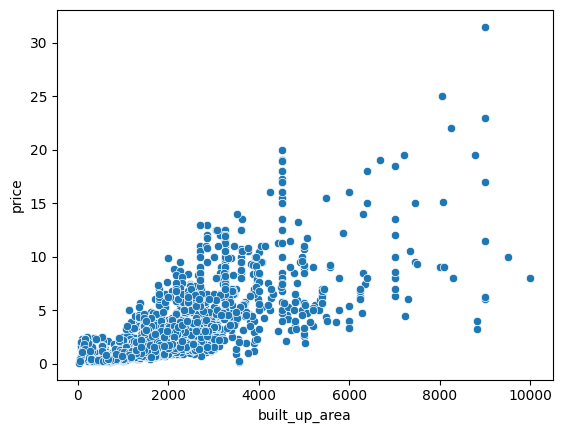

In [163]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])
plt.show()


In [164]:
df.columns

Index(['Unnamed: 0', 'property_type', 'society', 'sector', 'price',
       'price_per_sqft', 'area', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'floorNum', 'facing', 'agePossession', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'area_room_ratio'],
      dtype='object')

In [165]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [166]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,3,3,3,4.0,North-East,Relatively New,1310.0,0,0,0,0,0,2,97
1,1,flat,raheja vedaanta,sector 108,0.85,4637.0,3,3,2,2.0,North-East,Relatively New,1500.0,0,1,0,0,0,0,65
2,2,flat,511 sarahah tower,sector 12,0.60,8333.0,2,2,1,0.0,NaN,New Property,800.0,0,0,0,1,0,1,0
3,3,flat,laxmi pareena,sector 99a,0.30,6667.0,2,1,0,12.0,North,Undefined,500.0,0,0,0,0,0,0,0
4,4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,3,4,3,7.0,North,Relatively New,1315.0,0,1,0,0,0,2,152


In [167]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [168]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
378,391,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
391,406,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
664,698,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
804,840,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1044,1096,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
1314,1377,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
1452,1521,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,2,130
1476,1548,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1764,1850,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
2465,2612,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0


In [169]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [170]:
df['floorNum'].fillna(2.0,inplace=True)

/tmp/ipykernel_2753/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [171]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [172]:
1011/df.shape[0]

0.2851904090267983

### facing

<Axes: ylabel='count'>

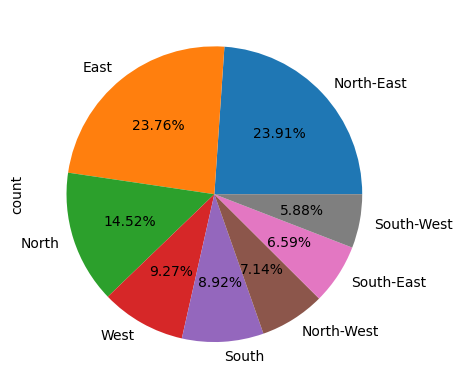

In [173]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [174]:
df.drop(columns=['facing'],inplace=True)

In [175]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1206,1265,flat,smart world orchard,sector 61,1.60,13913.0,2,2,2,4.0,Under Construction,1278.0,0,0,0,0,0,0,16
1884,1977,house,independent,sector 43,2.15,13030.0,1,1,0,1.0,Undefined,1650.0,0,0,0,0,0,0,0
768,804,flat,m3m golfestate,sector 65,6.10,18139.0,3,3,3,19.0,Moderately Old,3027.0,1,1,0,0,0,2,174
2320,2449,house,independent,sector 38,8.00,25616.0,10,10,3+,1.0,Undefined,3123.0,0,0,0,0,0,0,0
1654,1733,house,independent,sector 6,0.75,10519.0,2,4,1,3.0,Moderately Old,713.0,0,0,0,0,0,0,62


In [176]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [177]:
df.drop(index=[2536],inplace=True)

In [178]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [194]:
df[df['society'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3532,3789,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [196]:
df.drop(index=[3532],inplace=True)

In [197]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

Undefined in agePossession is treated as missing value.

In [179]:
df['agePossession'].value_counts()

agePossession
Relatively New        1601
New Property           555
Moderately Old         540
Old Property           294
Undefined              292
Under Construction     262
Name: count, dtype: int64

In [180]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,3,flat,laxmi pareena,sector 99a,0.30,6667.0,2,1,0,12.0,Undefined,500.0,0,0,0,0,0,0,0
11,11,house,independent,sector 9,1.65,18333.0,2,3,0,3.0,Undefined,900.0,0,0,0,0,0,0,0
33,33,flat,eldeco accolade,sector 33,1.20,8043.0,2,2,2,0.0,Undefined,1492.0,0,0,0,0,0,0,56
37,37,flat,central park flower valley,sector 33,2.50,13270.0,3,3,2,1.0,Undefined,2093.0,0,0,0,0,0,0,66
47,47,flat,ramprastha the edge towers,sector 37d,1.10,5528.0,3,3,3,9.0,Undefined,1990.0,0,0,0,0,0,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,3706,house,independent,sector 9,0.22,7407.0,2,2,2,1.0,Undefined,37.0,0,0,0,0,0,0,0
3488,3737,flat,ansal height 86,sector 86,0.80,5882.0,2,2,0,1.0,Undefined,1360.0,0,0,0,0,0,0,0
3499,3751,house,independent,sector 108,1.34,5000.0,1,1,0,1.0,Undefined,2680.0,0,0,0,0,0,0,0
3515,3768,house,independent,sector 67,3.00,11905.0,4,4,0,3.0,Undefined,2800.0,0,0,0,0,0,0,0


In [181]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [182]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [183]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           594
Moderately Old         578
Old Property           326
Under Construction     276
Undefined               53
Name: count, dtype: int64

In [184]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [185]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [186]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
New Property           595
Moderately Old         584
Old Property           329
Under Construction     278
Undefined               28
Name: count, dtype: int64

In [187]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [188]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [189]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         612
New Property           595
Old Property           329
Under Construction     278
Name: count, dtype: int64

In [190]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [191]:
df.to_csv('.\gurgaon_properties_missing_value_imputation.csv',index=False)

In [192]:
df.shape

(3544, 19)